<a href="https://colab.research.google.com/github/HamidMandi/MNE/blob/main/MNE_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
! git clone "https://github.com/mne-tools/mne-workshops.git"

Cloning into 'mne-workshops'...
remote: Enumerating objects: 170, done.
remote: Total 170 (delta 0), reused 0 (delta 0), pack-reused 170
Receiving objects: 100% (170/170), 115.03 MiB | 5.78 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
! pip install mne

     |████████████████████████████████| 6.9 MB 4.1 MB/s 


In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt


In [5]:
fname = "/content/mne-workshops/2018_06_Amsterdam/oddball_example_small-fif.gz"

# Reading data

In [8]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file /content/mne-workshops/2018_06_Amsterdam/oddball_example_small-fif.gz...


<ipython-input-8-7341ee706cdd>:1: RuntimeWarning: This filename (/content/mne-workshops/2018_06_Amsterdam/oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [9]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 STIM
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

# Inspecting raw Data [link](https://berdakh.github.io/blog/eeg/jupyter/2020/09/10/MNE-Tutorial.html)

Effective window size : 20.480 (s)


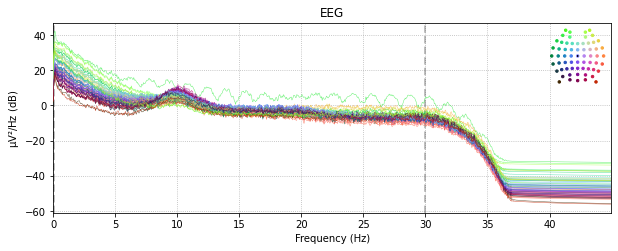

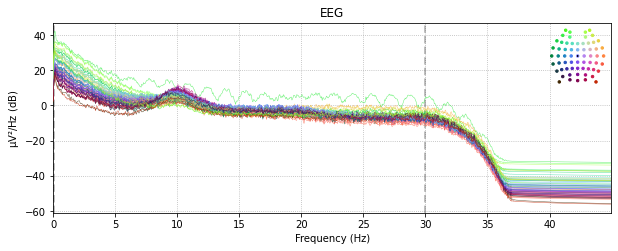

In [10]:
raw.plot_psd(fmax=45)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


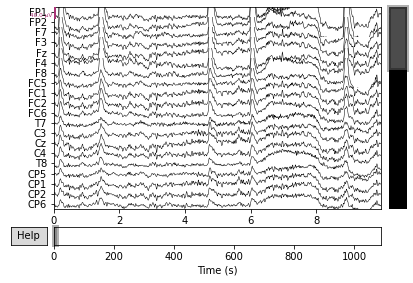

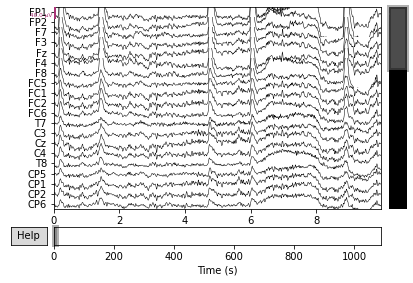

In [11]:
raw.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 165 samples (1.650 sec)

Effective window size : 20.480 (s)


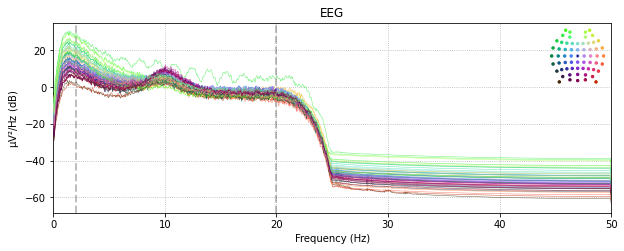

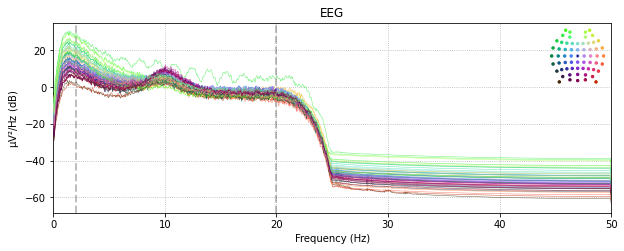

In [16]:
raw.copy().filter(2, 20).plot_psd()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


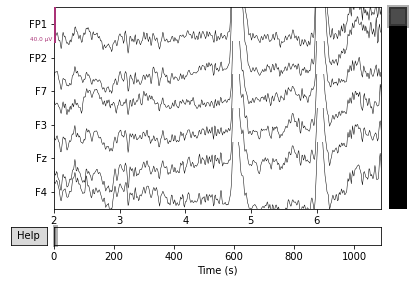

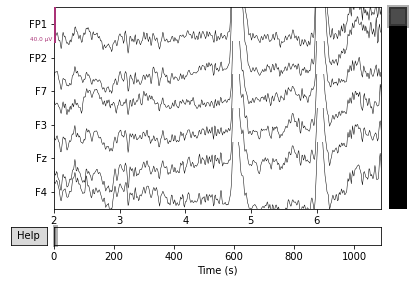

In [19]:
raw.plot(duration=5, start=2, n_channels=6)

In [18]:
raw.plot?

#ICA decomposition

In [23]:
ica = mne.preprocessing.ICA(n_components=20, max_iter=50)
ica.fit(raw.copy().filter(2, 45))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.8s.


<ICA | raw data decomposition, fit (fastica): 109098 samples, 20 components, channels used: "eeg">

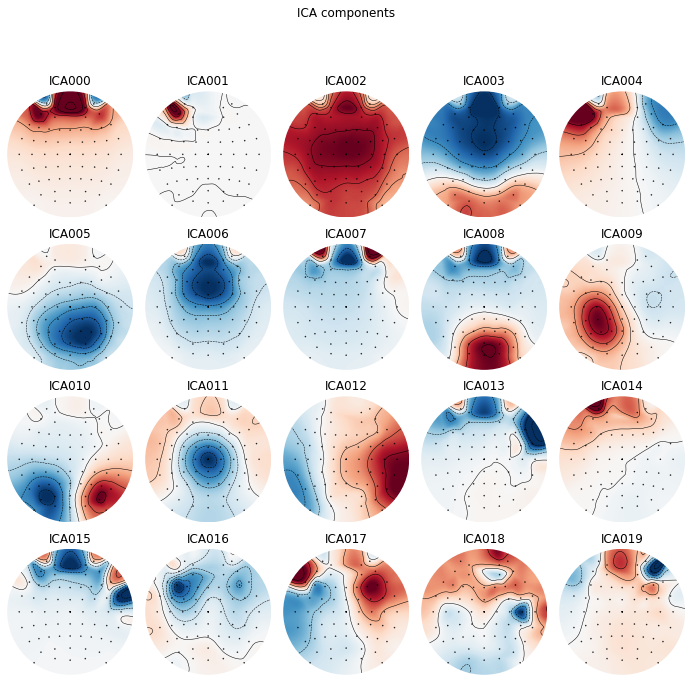

In [35]:
_ = ica.plot_components(outlines="skirt")

* For applying ICA on Raw --> ica.fit()
* For applying ICA.exclude --> ica.apply()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
545 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
545 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
545 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
545 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
545 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


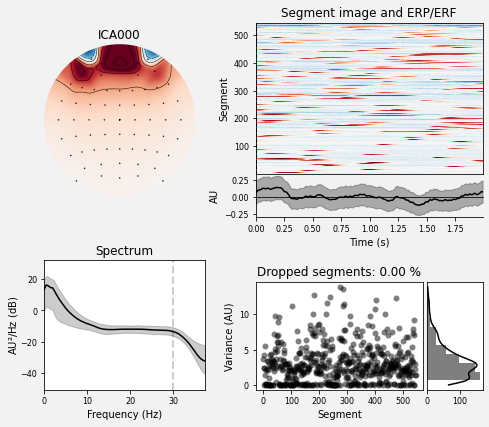

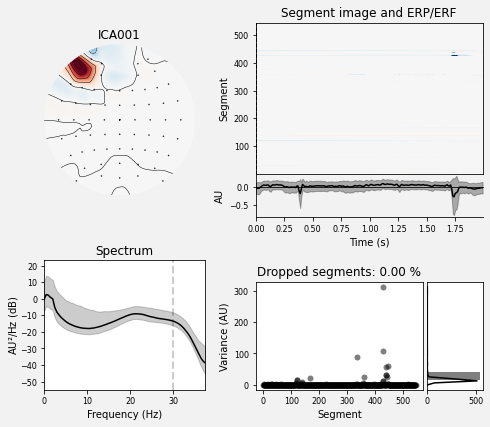

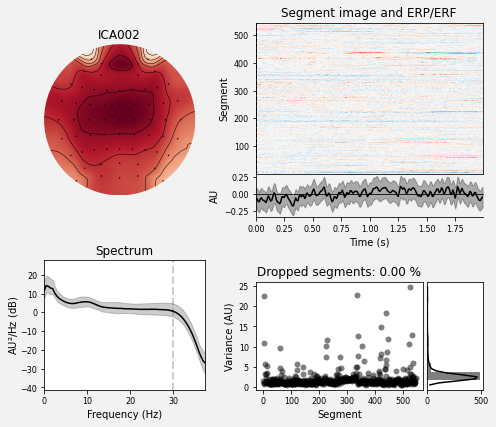

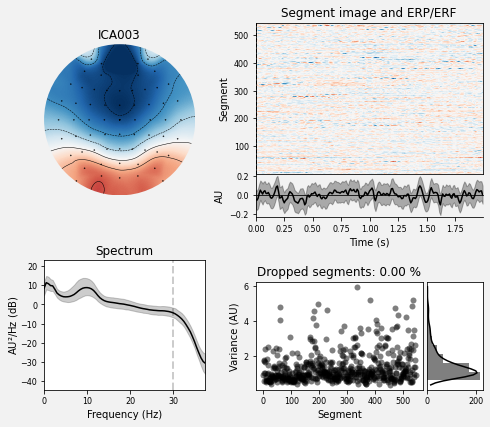

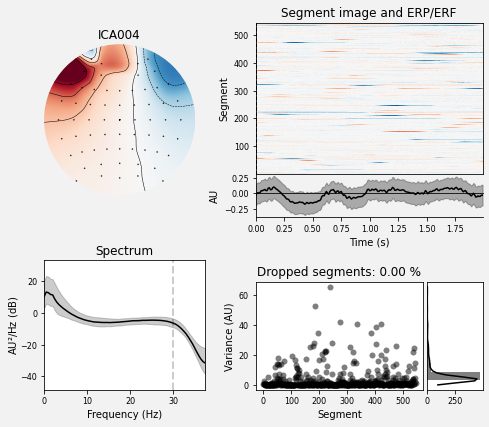

In [41]:
_ = ica.plot_properties(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


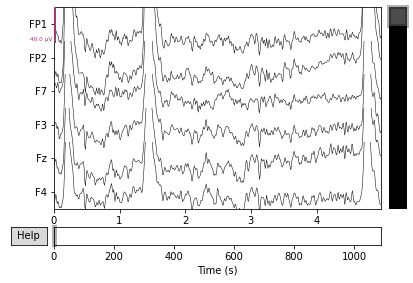

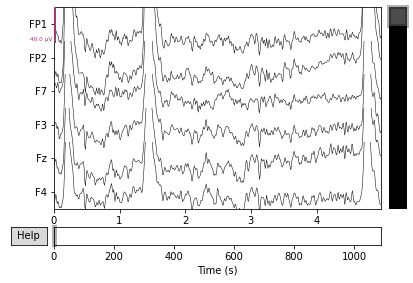

In [38]:
ica.exclude = [1, 10, 14, 17, 18, 19]
ica.apply(raw.copy(), exclude=ica.exclude).plot(duration=5, n_channels=6)

#Epoch [link](https://berdakh.github.io/blog/eeg/jupyter/2020/09/10/MNE-Tutorial.html)

For making Epoch we need events and also events ID. Finally, we catenate Raw data, events and events ID to make Epoch

`events` is simply an array (time in samples, zero, trigger);

In [50]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


We can visualize `events`

In [45]:
dir(mne.viz)

['Brain',
 'ClickableImage',
 '_3d',
 '_RAW_CLIP_DEF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_brain',
 '_figure',
 '_get_presser',
 '_plot_sources',
 'add_background_image',
 'adjust_axes',
 'backends',
 'centers_to_edges',
 'circle',
 'circular_layout',
 'compare_fiff',
 'concatenate_images',
 'create_3d_figure',
 'epochs',
 'evoked',
 'get_3d_backend',
 'get_brain_class',
 'ica',
 'iter_topography',
 'link_brains',
 'misc',
 'mne_analyze_colormap',
 'montage',
 'plot_alignment',
 'plot_arrowmap',
 'plot_bem',
 'plot_brain_colorbar',
 'plot_compare_evokeds',
 'plot_connectivity_circle',
 'plot_cov',
 'plot_csd',
 'plot_dipole_amplitudes',
 'plot_dipole_locations',
 'plot_drop_log',
 'plot_epochs',
 'plot_epochs_image',
 'plot_epochs_psd',
 'plot_epochs_psd_topomap',
 'plot_events',
 'plot_evoked',
 'plot_evoked_field',
 'plot_evoked_image',
 'plot_evoked_joint',
 'plot_evoked_topo',
 'plot_evoke

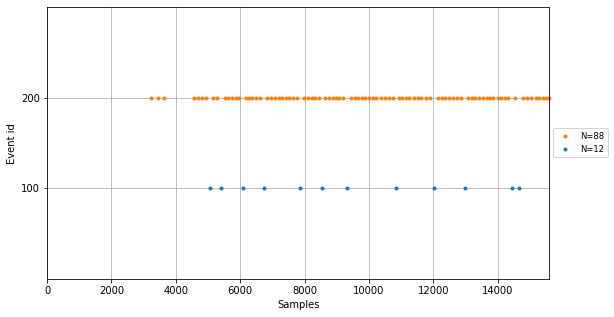

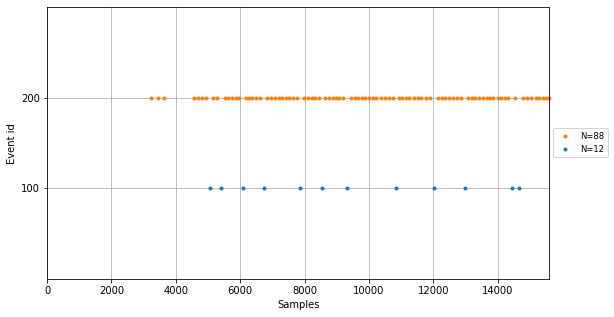

In [52]:
plt.rcParams['figure.figsize'] = [10, 5]
mne.viz.plot_events(events[:100])

For creating an `mne.Epochs` object, we require, in addition to the `raw` object and the `events` array, a dictionary of the intended condition names and the corresponding trigger numbers.

In [66]:
events_id = {"standard/STIM":200, "target/STIM":100}
epochs = mne.Epochs (raw, events, events_id, preload=True)

Not setting metadata
Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 903 events and 71 original time points ...
0 bad epochs dropped


Loading data for 903 events and 71 original time points ...
0 bad epochs dropped
Loading data for 903 events and 71 original time points ...
Loading data for 20 events and 71 original time points ...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


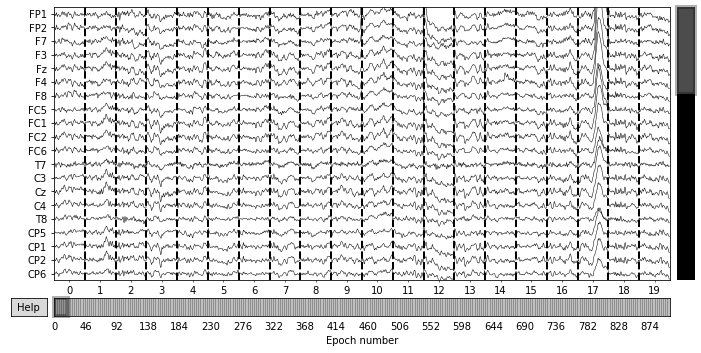

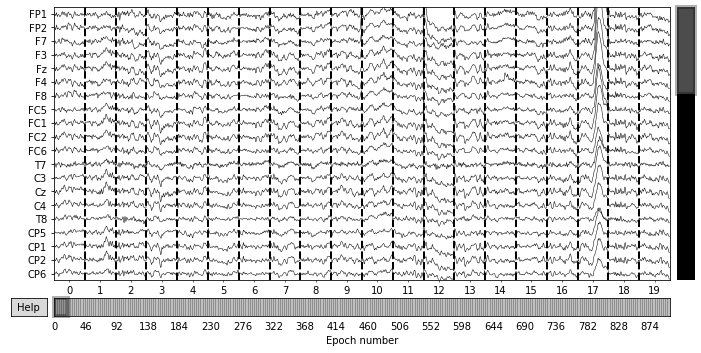

In [57]:
epochs.plot()

In [64]:
ica.apply(epochs, ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 14 ICA components
    Projecting back using 63 PCA components


<ipython-input-64-2be9aa310143>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(epochs, ica.exclude)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [67]:
epochs["target"]

Number of events,106
Events,target/STIM: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [68]:
epochs["STIM"]

Number of events,903
Events,standard/STIM: 797target/STIM: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [69]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 STIM
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Loading data for 903 events and 71 original time points ...
Not setting metadata
Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


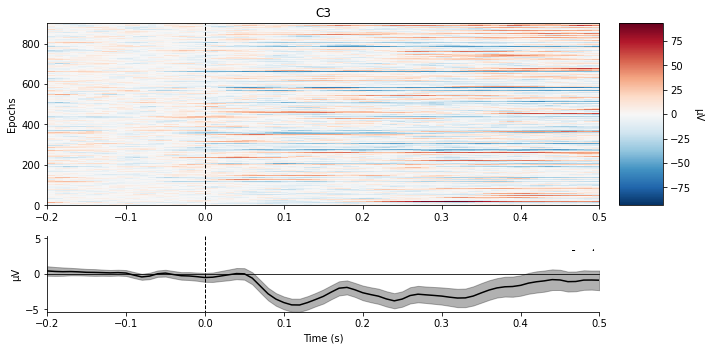

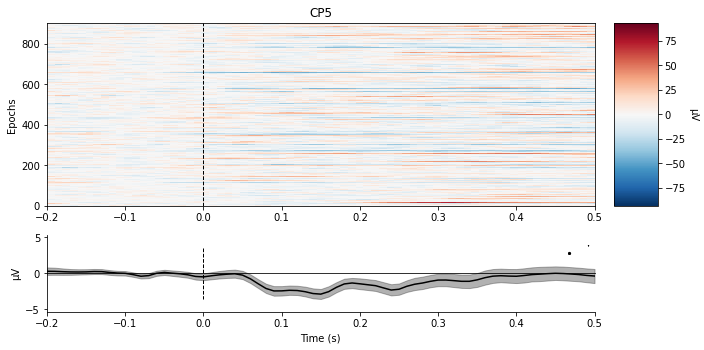

[<Figure size 720x360 with 4 Axes>, <Figure size 720x360 with 4 Axes>]

In [73]:
epoch.plot_image(picks=[12, 16])

To ensure we have as many Oddball as Standard trials, we can run ...

In [76]:
epochs.equalize_event_counts(events_id)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standard/STIM: 106target/STIM: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


#Save data

In [78]:
epochs.save("/content/gdrive/MyDrive/Colab Notebooks/MNE/oddball2-epo.fif")  # remember, the data has been cleaned of bad ICs

In [87]:
epochs_for_tfr = mne.Epochs(raw, events, events_id,                     # need longer data segment
                            tmin=-0.5, tmax=1.5, preload=True)

Not setting metadata
Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 903 events and 201 original time points ...
0 bad epochs dropped


In [90]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids=events_id)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-90-ab51e4e37d4d>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

(<Epochs |  212 events (all good), -0.5 - 1.5 sec, baseline -0.5 – 0 sec, ~20.9 MB, data loaded,
  'standard/STIM': 106
  'target/STIM': 106>,
 array([  0,   1,   2,   3,   4,   5,   6,   9,  12,  13,  14,  15,  18,
         19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  33,  34,  35,
         36,  39,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  59,  60,  61,  62,  63,  64,  65,  66,  69,
         70,  71,  72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122,
        123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188,
        193, 194, 197, 198, 199, 200, 201, 202, 203, 2